[View in Colaboratory](https://colab.research.google.com/github/ssorini/QTM120/blob/master/Copy_of_Lab_4.ipynb)

# Lab 4
The aim of this lab is to show you how to solve the linear regression problems in $\S6.6$ from HW 3 using TensorFlow!

This lab is based around a series of [notebooks](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/eager/python/examples/notebooks) provided by Google engineers that explain the basics of using the latest verions of Tensorflow.

I have modified them in order to explain to you how the core ideas in Machine learning and AI are based upon the fundamental topics of QTM 120, namely:
* multivariable functions and gradient vectors
* matrix multiplication and linear transformations
* linear regression and least squares (this is generalized in machine learning to neural networks and loss functions)


# An introduction to TensorFlow

We start with an introductory tutorial on using TensorFlow. It will cover:

* Importing required packages
* Creating and using Tensors

## Import TensorFlow

To get started, import the `tensorflow` module and enable eager execution.
Eager execution enables a more interactive frontend to TensorFlow, the details of which we will discuss much later.

In [2]:
import tensorflow as tf

tfe = tf.contrib.eager # Shorthand for some symbols

tf.enable_eager_execution()

ValueError: ignored

## What is an array? 

In NumPy, an array, more precisely, an `ndarray`, is a like a list, except that the type of objects stored in it is constrained by requiring they all be of the same numeric type, e.g. all integers, or all real numbers (the *data type*).

Why not say matrix instead of saying array?

A matrix may be stored on a computer as an array, but an array need not be a matrix. This is why we have different terminology when using a computer versus using just doing math. An array is more general and is one of many ways of structuring data on a computer.

For instance, a matrix
$$ \begin{bmatrix} 1\ 2 \\ 3\  4 \end{bmatrix}$$
may be thought of in terms of rows and columns, whereas an array need not be. This matrix could be stored in an array as a nested list of rows like
$[[1 , 2], [3, 4] ]$
or as a nested list of columns $[[1 , 3], [2 , 4]]$ or as a list of entries $[1, 2, 3, 4]$ read from left to right, through all the rows from top to bottom. This determines the *shape* of the array. For more details on these intricacies in structuring data see [Memory layout of multi-dimensional arrays](https://eli.thegreenplace.net/2015/memory-layout-of-multi-dimensional-arrays).

## What is a tensor?
In TensorFlow, a *Tensor* is a multi-dimensional array. What does "multi-dimensional" mean? A vector is a one-dimensional array and a matrix a two-dimensional array. Now, think of a matrix where in each entry you find not a number, but a vector in $\mathbb{R}^3$. That is an example of a three-dimensional array.

A tensor's `shape` is a d-tuple where d is the number of dimensions and inside the tuple one finds the size for each dimension.  For example, viewing a 3 x 4 matrix as a tensor, it would have `shape` $[3 \ 4]$. Consider these examples given in the code cell below.

In [3]:
A = [[1 , 2], [3 , 4]]
t = [[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]]

print("dimension of A equals {}".format(tf.rank(A)))  #3 tells you it is two dimensional
print("dimension of t equals {}".format(tf.rank(t)))  #3 tells you it is three dimensional
print("shape of A equals {}".format(tf.shape(A)))
print("shape of t equals {}".format(tf.shape(t)))



dimension of A equals 2
dimension of t equals 3
shape of A equals [2 2]
shape of t equals [2 2 3]



Additionally, Tensors can reside in accelerator (like GPU) memory. TensorFlow offers a rich library of operations ([tf.add](https://www.tensorflow.org/api_docs/python/tf/add), [tf.matmul](https://www.tensorflow.org/api_docs/python/tf/matmul), [tf.linalg.inv](https://www.tensorflow.org/api_docs/python/tf/linalg/inv) etc.) that consume and produce Tensors. These operations automatically convert native Python types. For example:


In [4]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))
print(tf.encode_base64("hello world"))

# Operator overloading is also supported
print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(b'aGVsbG8gd29ybGQ', shape=(), dtype=string)
tf.Tensor(13, shape=(), dtype=int32)


Each Tensor has a shape and a datatype

In [5]:
x = tf.matmul([[1]], [[2, 3]])
print(x.shape)
print(x.dtype)

(1, 2)
<dtype: 'int32'>


The most obvious differences between NumPy arrays and TensorFlow Tensors are:

1. Tensors can be backed by accelerator memory (like GPU, TPU).
2. Tensors are immutable.

### NumPy Compatibility

Conversion between TensorFlow Tensors and NumPy ndarrays is quite simple as:
* TensorFlow operations automatically convert NumPy ndarrays to Tensors.
* NumPy operations automatically convert Tensors to NumPy ndarrays.

Tensors can be explicitly converted to NumPy ndarrays by invoking the `.numpy()` method on them.
These conversions are typically cheap as the array and Tensor share the underlying memory representation if possible. However, sharing the underlying representation isn't always possible since the Tensor may be hosted in GPU memory while NumPy arrays are always backed by host memory, and the conversion will thus involve a copy from GPU to host memory.

In [6]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


## Next Steps

We covered the most fundamental concepts in TensorFlow - `Tensor`s and operations. Next we will cover automatic differentiation - a building block required for training many machine learning models like neural networks.
## Derivatives of a function

TensorFlow provides APIs for automatic differentiation - computing the derivative of a function. The way that more closely mimics the math is to encapsulate the computation in a Python function, say `f`, and use `tfe.gradients_function` to create a function that computes the derivatives of `f` with respect to its arguments. If you're familiar with [autograd](https://github.com/HIPS/autograd) for differentiating numpy functions, this will be familiar. For example: 

In [7]:
from math import pi

def f(x):
  return tf.square(tf.sin(x))

# Compute gradient of f
grad_f = tfe.gradients_function(f)

# gradients_function will return the gradient vector of f as
# a list with a single element. We append [0] to
# the end in order to obtain the first item in that list
print(grad_f(pi/2)[0]) 

# check that gradient equals what we expect
print(2*tf.sin(pi/2)*tf.cos(pi/2))

tf.Tensor(-8.742278e-08, shape=(), dtype=float32)
tf.Tensor(-8.742278e-08, shape=(), dtype=float32)


### Higher-order gradients

The same API can be used to differentiate as many times as you like:


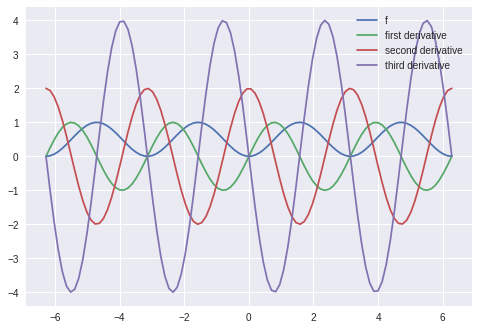

In [8]:
def f(x):
  return tf.square(tf.sin(x))

def grad(f):
  return lambda x: tfe.gradients_function(f)(x)[0]

x = tf.lin_space(-2*pi, 2*pi, 100)  # 100 points between -2π and +2π

import matplotlib.pyplot as plt

plt.plot(x, f(x), label="f")
plt.plot(x, grad(f)(x), label="first derivative")
plt.plot(x, grad(grad(f))(x), label="second derivative")
plt.plot(x, grad(grad(grad(f)))(x), label="third derivative")
plt.legend()
plt.show()

## Gradient tapes

Every differentiable TensorFlow operation has an associated gradient function. For example, the gradient function of `tf.square(x)` would be a function that returns $x^2$.  To compute the gradient of a user-defined function (like `f(x)` in the example above), TensorFlow first "records" all the operations applied to compute the output of the function. We call this record a "tape". It then uses that tape and the gradients functions associated with each primitive operation to compute the gradients of the user-defined function using [reverse mode differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation).

Since operations are recorded as they are executed, Python control flow (using `if`s and `while`s for example) is naturally handled:


In [9]:
def f(x, y):
  output = 1
  for i in range(y):
    output = tf.multiply(output, x)
  return output

def g(x, y):
  # Return the gradient of `f` with respect to it's first parameter
  return tfe.gradients_function(f)(x, y)[0]

print(f(3.0, 2).numpy() == 9.0)   # f(x, 2) is x * x
print(g(3.0, 2).numpy() == 6.0)   # And its gradient will be 2 * x
print(f(4.0, 3).numpy() == 64.0)  # f(x, 3) is x * x * x
print(g(4.0, 3).numpy() == 48.0)  # And its gradient will be 3 * x * x

True


TypeError: ignored

At times it may be inconvenient to encapsulate computation of interest into a function. For example, if you want the gradient of the output with respect to intermediate values computed in the function. In such cases, the slightly more verbose but explicit [tf.GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape) context is useful. All computation inside the context of a `tf.GradientTape` is "recorded".

For example:

In [10]:
# let x be a 2x2 matrix with every entry the number 1
x = tf.ones((2, 2))

# Compute the gradient inside the 't' context manager, essentially
# z will be the function that takes as input a 2x2
# matrix, adds all the entries, then squares the result.
with tf.GradientTape(persistent=True) as t:
  t.watch(x)
  y = tf.reduce_sum(x)
  z = tf.multiply(y, y)

# Use the same tape to compute the derivative of z with respect to the
# intermediate value y.
dz_dy = t.gradient(z, y)

print(dz_dy.numpy() ==  2*y.numpy())

True


## Next Steps

In this tutorial we covered gradient computation in TensorFlow. With that we have enough of the primitives required to build and train a linear regression model.

# Training Models

In the previous tutorial we covered the TensorFlow APIs for automatic differentiation, a basic building block for machine learning.
In this tutorial we will use the TensorFlow primitives introduced in the prior tutorials to do some simple machine learning.

TensorFlow also includes a higher-level neural networks API (`tf.keras`) which provides useful abstractions to reduce boilerplate. We strongly recommend those higher level APIs for people working with neural networks. However, in this short tutorial we cover linear regression training from first principles.
## Variables

Tensors in TensorFlow are immutable stateless objects. Machine learning models, however, need to have changing state: as your model trains, the same code to compute predictions should behave differently over time (hopefully with a lower loss!). To represent this state which needs to change over the course of your computation, you can choose to rely on the fact that Python is a stateful programming language:

In [11]:
# Using python state
x = tf.zeros([10, 10])
x += 2  # This is equivalent to x = x + 2, which does not mutate the original
        # value of x
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


TensorFlow, however, has stateful operations built in, and these are often more pleasant to use than low-level Python representations of your state. To represent weights in a model, for example, it's often convenient and efficient to use TensorFlow variables.

A Variable is an object which stores a value and, when used in a TensorFlow computation, will implicitly read from this stored value. There are operations (`tf.assign_sub`, `tf.scatter_update`, etc) which manipulate the value stored in a TensorFlow variable.

In [12]:
v = tfe.Variable(1.0)
print(v.numpy() == 1.0)

# Re-assign the value
v.assign(3.0)
print(v.numpy() == 3.0)

# Use `v` in a TensorFlow operation like tf.square() and reassign
v.assign(tf.square(v))
print(v.numpy() == 9.0)

True
True
True


Computations using Variables are automatically traced when computing gradients. 
Using Variables is also a way to quickly let a reader of your code know that this piece of state is mutable.

## Example: Fitting a linear model

Let's now put the few concepts we have so far ---`Tensor`, `GradientTape`, `Variable` --- to build and train a simple model. This typically involves a few steps:

1. Define the model.
2. Define a loss function.
3. Obtain training data.
4. Run through the training data and use an "optimizer" to adjust the variables to fit the data.

In this tutorial, we'll walk through a trivial example of a simple linear model: `f(x) = x * W + b`, which has two variables - `W` and `b`. Furthermore, we'll synthesize data such that a well trained model would have `W = 3.0` and `b = 2.0`.

### Define the model

Let's define a simple class to encapsulate the variables and the computation.

In [0]:
class LinearModel(object):
  def __init__(self):
    # Initialize variable to (5.0, 0.0)
    # In practice, these should be initialized to random values.
    self.W = tfe.Variable(5.0)
    self.b = tfe.Variable(0.0)
    
  def __call__(self, x):
    return self.W * x + self.b

Next we instantiate a new linear model which we denote by `Y`, note, according to the definition of the class, we are working with the linear model $$Y = Wx+b$$. Looking at the class definition, the default values for `W` and `b` are 5 and 0 respectively, so `Y = 5*x` initially. Indeed, in the code below we find that $$Y(3.0)=15.0$$

In [14]:
Y = LinearModel() 

print(Y(3.0).numpy() == 15.0) # 

True


### Define a loss function

A loss function measures how well the output of a model for a given input matches the desired output. Let's use the standard 'least squares' loss, namely the sum of squares of the differences between the predicted value $Y(x_i)$ for each input $x_i$ and the actual value $y_i$  $$(Y(x_1)-y_1)^2+(Y(x_2)-y_2)^2+\cdots+(Y(x_n)-y_n)^2$$
This is also called LSE which is short least-squares-error.

In [0]:
def LSE(predicted_y, desired_y):
  return tf.reduce_sum(tf.square(predicted_y - desired_y))

def MSE(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

### Obtain training data

Let's record the training data. If the data is $$x_1=0,\\ x_2=1,\\ x_3=2,\\ x_4=3\\ \text{and} \\y_1=1,\\ y_2 = 1,\\ y_3 = 2,\\ y_4 =2$$
then we use the code below to record this.

In [0]:
inputs  = [0, 1, 2, 3]
outputs = [1, 1, 2, 2]

Before we train the model let's visualize where the model stands right now. We'll plot the model's predictions in red and the training data in blue.

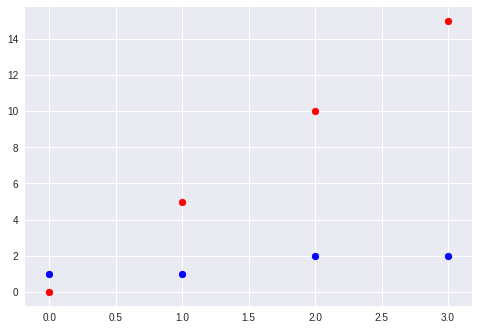

Current loss: 


NameError: ignored

In [17]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, color='b')
plt.scatter(inputs, Y(inputs), color='r')
plt.show()

print('Current loss: '),
print(loss(Y(inputs), outputs).numpy())

### Define a training loop

We now have our network and our training data. Let's train it, i.e., use the training data to update the model's variables (`W` and `b`) so that the loss goes down using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent). There are many variants of the gradient descent scheme that are captured in `tf.train.Optimizer` implementations. We'd highly recommend using those implementations, but in the spirit of building from first principles, in this particular example we will implement the basic math ourselves.

Below, `assign_sub` is short for "subtract from the original then assign the result". Also, `dW` and `db` are the component of the gradient vector of the loss of the differences.

In [0]:
def train(Y, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = LSE(Y(inputs), outputs)
  dW, db = t.gradient(current_loss, [Y.W, Y.b])
  Y.W.assign_sub(learning_rate * dW)
  Y.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=62.50000
Epoch  1: W=3.82 b=-0.48, loss=28.73301
Epoch  2: W=3.03 b=-0.78, loss=13.79963
Epoch  3: W=2.49 b=-0.96, loss=7.16737
Epoch  4: W=2.13 b=-1.06, loss=4.19524
Epoch  5: W=1.88 b=-1.11, loss=2.83820
Epoch  6: W=1.71 b=-1.13, loss=2.19503
Epoch  7: W=1.59 b=-1.13, loss=1.86854
Epoch  8: W=1.50 b=-1.11, loss=1.68361
Epoch  9: W=1.43 b=-1.08, loss=1.56299
Epoch 10: W=1.38 b=-1.04, loss=1.47254
Epoch 11: W=1.34 b=-1.00, loss=1.39714
Epoch 12: W=1.30 b=-0.96, loss=1.33004
Epoch 13: W=1.27 b=-0.92, loss=1.26820
Epoch 14: W=1.25 b=-0.88, loss=1.21019
Epoch 15: W=1.22 b=-0.84, loss=1.15531
Epoch 16: W=1.20 b=-0.80, loss=1.10319
Epoch 17: W=1.18 b=-0.76, loss=1.05361
Epoch 18: W=1.16 b=-0.72, loss=1.00639
Epoch 19: W=1.14 b=-0.68, loss=0.96140
Epoch 20: W=1.13 b=-0.65, loss=0.91854
Epoch 21: W=1.11 b=-0.61, loss=0.87769
Epoch 22: W=1.09 b=-0.57, loss=0.83877
Epoch 23: W=1.07 b=-0.54, loss=0.80168
Epoch 24: W=1.06 b=-0.51, loss=0.76633
Epoch 25: W=1.04 b=-0.4

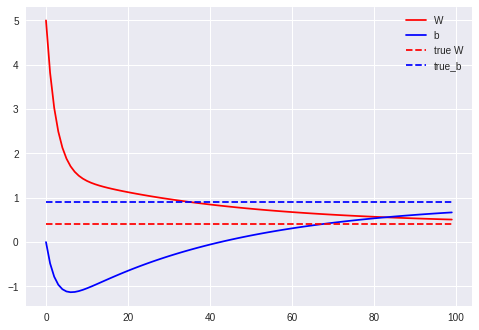

In [19]:
TRUE_W = 0.4
TRUE_b = 0.9

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(100)
for epoch in epochs:
  Ws.append(Y.W.numpy())
  bs.append(Y.b.numpy())
  current_MSE = MSE(Y(inputs), outputs)

  train(Y, inputs, outputs, learning_rate=0.01)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_MSE))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()
  

Above, we see how `W` and `b` evolve as we move in the direction of negative the gradient vector of the loss in order to find the values of `W` and `b` that minimize the loss. Correct answer is $W = .4$ and $b = 0.9$ which we see was realized already after 70 iterations (epoch 70). 

# Solution to HW 3 $\S 6.6 \hspace{0.1cm} \#2$


We enter our the $x$ values as input, the $y$ values as output. 


In [0]:
inputs  = [1, 2, 4, 5]
outputs = [0, 1, 2, 3]

Then we construct/instantiate the model.

In [0]:
Y = LinearModel() 

Next we train our model on the data we gave it.

Epoch  0: W=5.00 b=0.00, loss=228.50000
Epoch  1: W=0.90 b=-1.08, loss=0.13940
Epoch  2: W=0.83 b=-1.09, loss=0.07725
Epoch  3: W=0.83 b=-1.08, loss=0.07555
Epoch  4: W=0.83 b=-1.07, loss=0.07392
Epoch  5: W=0.82 b=-1.07, loss=0.07234
Epoch  6: W=0.82 b=-1.06, loss=0.07081
Epoch  7: W=0.82 b=-1.05, loss=0.06933
Epoch  8: W=0.82 b=-1.04, loss=0.06790
Epoch  9: W=0.82 b=-1.04, loss=0.06652
Epoch 10: W=0.81 b=-1.03, loss=0.06518
Epoch 11: W=0.81 b=-1.02, loss=0.06388
Epoch 12: W=0.81 b=-1.02, loss=0.06263
Epoch 13: W=0.81 b=-1.01, loss=0.06141
Epoch 14: W=0.81 b=-1.00, loss=0.06024
Epoch 15: W=0.81 b=-1.00, loss=0.05910
Epoch 16: W=0.80 b=-0.99, loss=0.05800
Epoch 17: W=0.80 b=-0.98, loss=0.05694
Epoch 18: W=0.80 b=-0.98, loss=0.05591
Epoch 19: W=0.80 b=-0.97, loss=0.05491
Epoch 20: W=0.80 b=-0.96, loss=0.05394
Epoch 21: W=0.80 b=-0.96, loss=0.05301
Epoch 22: W=0.79 b=-0.95, loss=0.05211
Epoch 23: W=0.79 b=-0.95, loss=0.05123
Epoch 24: W=0.79 b=-0.94, loss=0.05039
Epoch 25: W=0.79 b=-0.94

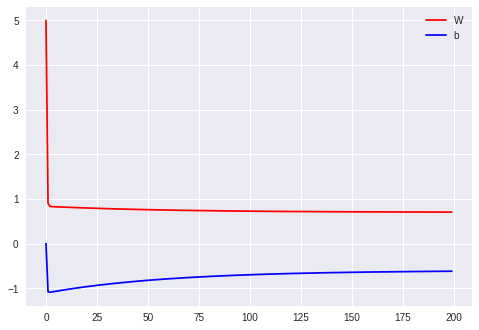

In [22]:
# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(200)
for epoch in epochs:
  Ws.append(Y.W.numpy())
  bs.append(Y.b.numpy())
  current_MSE = MSE(Y(inputs), outputs)

  train(Y, inputs, outputs, learning_rate=0.01)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_MSE))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.legend(['W', 'b'])
plt.show()

 Finally we inspect the values of W and b to see if the training converged to the solution.
 
 It may be necessary to reconstruct the model and tune the learning rate, the number of epochs, and even the initial "weights" for W and b in the model (Class definition) in order to obtain good convergence. 
 
 For instance, here 100 epochs was not sufficient for convergence. The solution  $$W = 0.7\\ b = 0.6$$ was not achieved until epoch 182. 
 
 How do you know it converged to the solution? Here for instance, try 500 epochs and you will see you get the same result!


#Lab 4 Submission

##6.6 # 1

Find the equation $$y=B_0+B_1x$$ for the least squares regression line for the data $$(0,1),(1,1),(2,2),(3,2)$$

Epoch  0: W=5.00 b=0.00, loss=62.50000
Epoch  1: W=3.82 b=-0.48, loss=28.73301
Epoch  2: W=3.03 b=-0.78, loss=13.79963
Epoch  3: W=2.49 b=-0.96, loss=7.16737
Epoch  4: W=2.13 b=-1.06, loss=4.19524
Epoch  5: W=1.88 b=-1.11, loss=2.83820
Epoch  6: W=1.71 b=-1.13, loss=2.19503
Epoch  7: W=1.59 b=-1.13, loss=1.86854
Epoch  8: W=1.50 b=-1.11, loss=1.68361
Epoch  9: W=1.43 b=-1.08, loss=1.56299
Epoch 10: W=1.38 b=-1.04, loss=1.47254
Epoch 11: W=1.34 b=-1.00, loss=1.39714
Epoch 12: W=1.30 b=-0.96, loss=1.33004
Epoch 13: W=1.27 b=-0.92, loss=1.26820
Epoch 14: W=1.25 b=-0.88, loss=1.21019
Epoch 15: W=1.22 b=-0.84, loss=1.15531
Epoch 16: W=1.20 b=-0.80, loss=1.10319
Epoch 17: W=1.18 b=-0.76, loss=1.05361
Epoch 18: W=1.16 b=-0.72, loss=1.00639
Epoch 19: W=1.14 b=-0.68, loss=0.96140
Epoch 20: W=1.13 b=-0.65, loss=0.91854
Epoch 21: W=1.11 b=-0.61, loss=0.87769
Epoch 22: W=1.09 b=-0.57, loss=0.83877
Epoch 23: W=1.07 b=-0.54, loss=0.80168
Epoch 24: W=1.06 b=-0.51, loss=0.76633
Epoch 25: W=1.04 b=-0.4

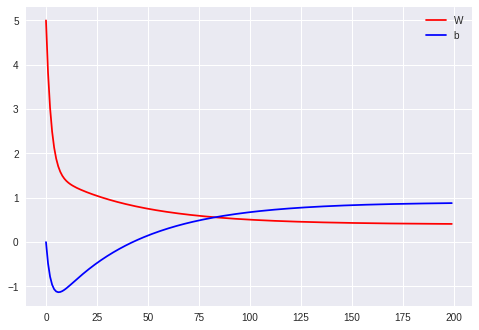

In [23]:
inputs  = [0, 1, 2, 3]
outputs = [1, 1, 2, 2]

Y = LinearModel() 

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(200)
for epoch in epochs:
  Ws.append(Y.W.numpy())
  bs.append(Y.b.numpy())
  current_MSE = MSE(Y(inputs), outputs)

  train(Y, inputs, outputs, learning_rate=0.01)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_MSE))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.legend(['W', 'b'])
plt.show()

The array and the graph converged to $$W=.4 \\ b=.9$$
This signifies that the equation of least squares is $$y=.4x+.9$$